import the necessary packages

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [7]:
data = pd.read_csv(r'D:\M_Tech\MLOPS\assignment\assignment\MlopsAssignment\data\mobile_data.csv')

In [8]:
data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [9]:
data['price_range'].unique()

array([1, 2, 3, 0])

In [10]:
print("columns of data",data.columns)
r,c = data.shape
print(f"Shape of the data Rows: {r} columns: {c}")

columns of data Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')
Shape of the data Rows: 2000 columns: 21


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [12]:
data.isnull().sum().sum()

np.int64(0)

In [13]:
data.duplicated().sum()

np.int64(0)

m_dep
0.1    320
0.2    213
0.8    208
0.5    205
0.7    200
0.3    199
0.9    195
0.6    186
0.4    168
1.0    106
Name: count, dtype: int64
Index([0.1, 0.2, 0.8, 0.5, 0.7, 0.3, 0.9, 0.6, 0.4, 1.0], dtype='float64', name='m_dep') [320 213 208 205 200 199 195 186 168 106]


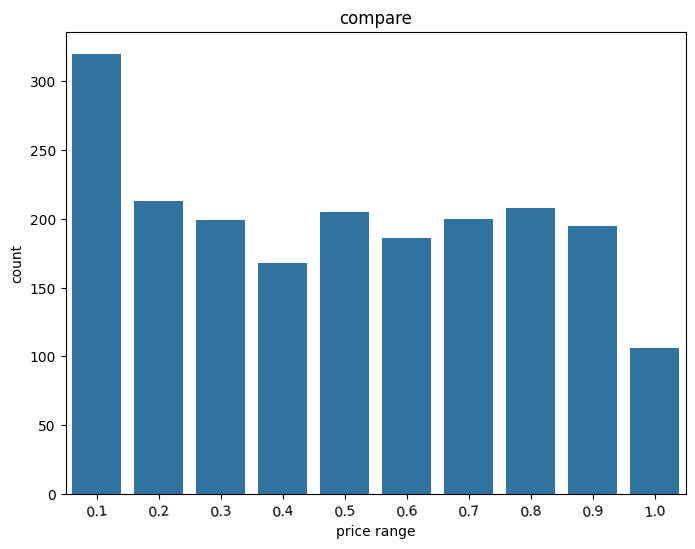

In [14]:
priceCnt = data['m_dep'].value_counts()
print(priceCnt)
plt.figure(figsize = (8,6))
print(priceCnt.index,priceCnt.values)
sns.barplot(x=priceCnt.index,y=priceCnt.values)

plt.title("compare")
plt.xlabel("price range")
plt.ylabel("count")
plt.xticks(rotation =5)
plt.show()

<Axes: xlabel='price_range', ylabel='Count'>

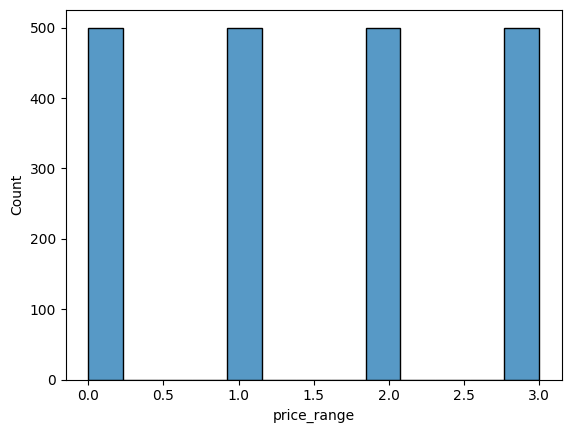

In [15]:
sns.histplot(data['price_range'])

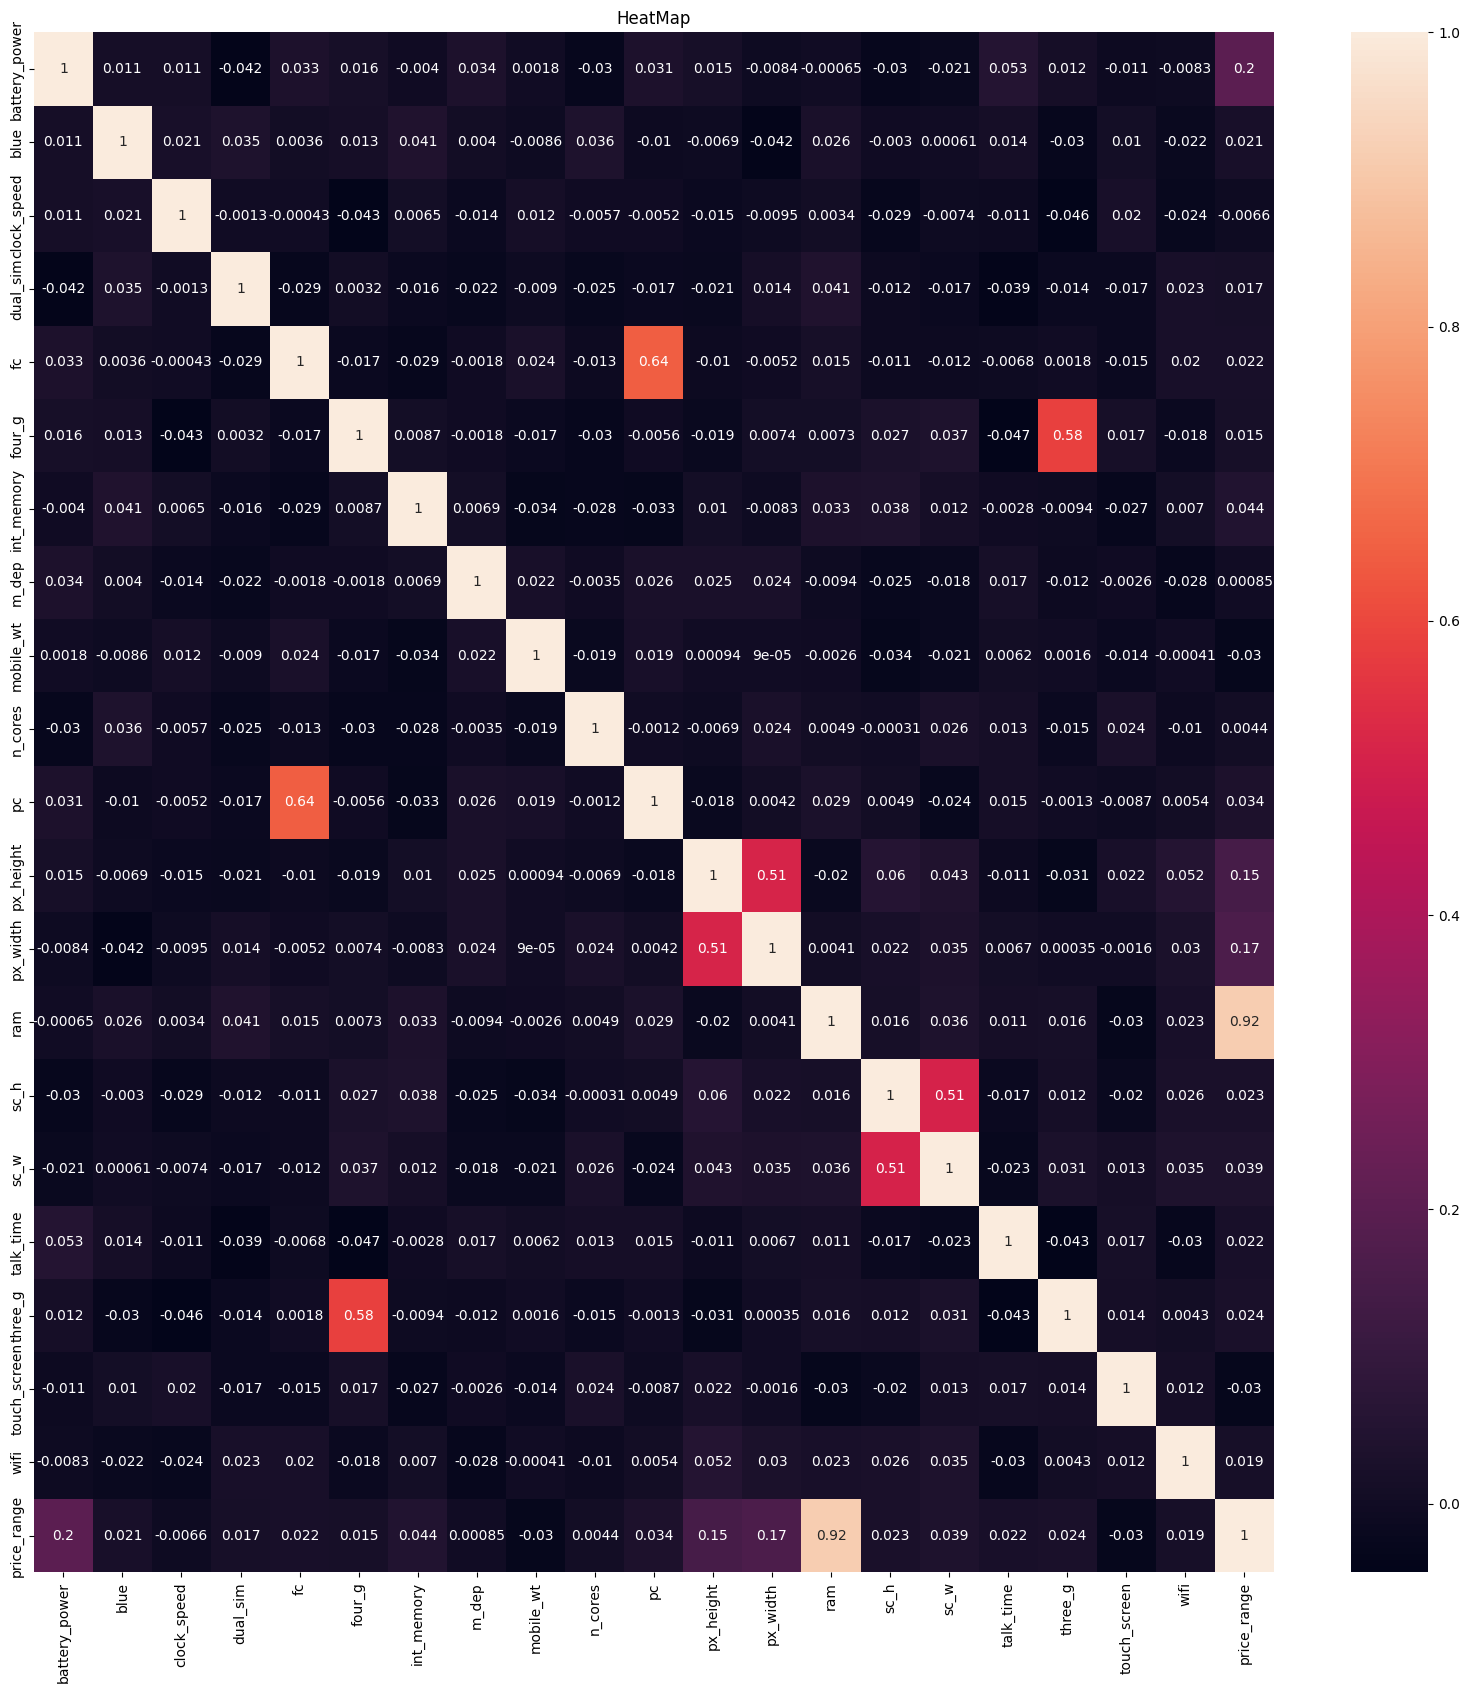

In [16]:
co_relationMatrix = data.corr()
plt.figure(figsize=(20,20))
sns.heatmap(co_relationMatrix,annot=True)
plt.title("HeatMap")
plt.show()

In [17]:
data = data.drop(['three_g'],axis=1)

In [18]:
data

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,14,1222,1890,668,13,4,19,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,3,915,1965,2032,11,10,16,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,3,868,1632,3057,9,1,5,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,5,336,670,869,18,10,19,1,1,0


In [19]:
data.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'touch_screen', 'wifi',
       'price_range'],
      dtype='object')

In [20]:
x = data.iloc[:,:-1]
y = data['price_range']

X_train,X_test,Y_train,Y_test = train_test_split(x,y)


In [21]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
TreeModel = DecisionTreeRegressor(random_state=1)
# Fit Model
TreeModel.fit(X_train, Y_train)

# Make validation predictions and calculate mean absolute error
val_predictions = TreeModel.predict(X_test)
val_mae = mean_absolute_error(val_predictions, Y_test)
print("Validation MAE: {:,.0f}".format(val_mae))

Validation MAE: 0


In [22]:
import joblib

joblib.dump(TreeModel,"model.joblib")

['model.joblib']

In [24]:
model_job = joblib.load(r"D:\M_Tech\MLOPS\assignment\assignment\MlopsAssignment\src\model.joblib")
model_job.predict(X_test)

array([2., 3., 0., 0., 3., 2., 1., 3., 0., 1., 3., 0., 0., 0., 2., 0., 3.,
       0., 1., 1., 2., 0., 2., 1., 3., 2., 3., 0., 2., 3., 2., 2., 2., 2.,
       3., 3., 0., 3., 0., 2., 0., 3., 0., 3., 3., 1., 1., 1., 1., 1., 3.,
       3., 2., 2., 3., 3., 2., 3., 0., 1., 0., 0., 1., 2., 1., 3., 1., 1.,
       2., 1., 1., 1., 2., 1., 2., 2., 3., 3., 1., 1., 0., 3., 0., 2., 2.,
       3., 1., 2., 1., 1., 3., 2., 3., 3., 0., 2., 1., 3., 0., 0., 0., 2.,
       0., 3., 0., 3., 2., 1., 0., 3., 0., 2., 0., 2., 2., 2., 0., 0., 3.,
       0., 2., 2., 2., 3., 3., 2., 1., 0., 0., 3., 2., 0., 3., 0., 2., 1.,
       3., 1., 2., 1., 0., 2., 2., 0., 3., 0., 1., 2., 0., 3., 2., 0., 1.,
       2., 1., 0., 3., 1., 2., 0., 0., 1., 0., 0., 3., 3., 3., 2., 2., 0.,
       0., 0., 1., 0., 3., 3., 1., 0., 2., 3., 1., 0., 0., 0., 2., 3., 3.,
       1., 3., 2., 3., 2., 2., 0., 3., 1., 3., 3., 1., 1., 1., 2., 1., 3.,
       1., 3., 1., 1., 0., 2., 0., 0., 2., 1., 0., 0., 1., 0., 0., 2., 3.,
       3., 0., 1., 2., 3.